## TOC
0. Daten aufbereiten und Voranalysen
1. Sortierung des Erscheinungsjahre absteigend
2. Analyse Materialtype "Book", "eBook" & "Audiobook"
3. Checkouts im Verhältnis zu Sacherschließung und Physische Form (Usageclass)
    * 3a. Sind Ressourcen mit mehr Schlagwörtern häufiger entliehen?
    * 3b. Checkouts nach Digital und Physical

## 0. Daten aufbereiten und Voranalysen

In [132]:
import urllib.request
import pandas as pd

### Daten via API holen und als .csv speichern

In [133]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2018&$limit=10000"
checkout_file = "checkout.csv"
urllib.request.urlretrieve(url, checkout_file)

('checkout.csv', <http.client.HTTPMessage at 0x7f78d7afd340>)

### Dataframe erstellen fuer checkout_file

In [134]:
checkouts_df = pd.read_csv(checkout_file)
checkouts_df

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Physical,Horizon,BOOK,2018,12,1,"Naruto. Vol. 65, Hashirama and Madara / story ...","Kishimoto, Masashi, 1974-",Naruto Fictitious character Comic books strips...,"VIZ Media,",[2014]
1,Physical,Horizon,BOOK,2018,12,2,Oishisō na shirokuma / Shibata Keiko.,"Shibata, Keiko.","Polar bear Juvenile fiction, Food Juvenile fic...","Pīeichipīkenkyūjo,",2017.
2,Physical,Horizon,VIDEODISC,2018,12,7,Like crazy / Paramount Vantage ; Indian Paintb...,NaN,"First loves Drama, College students Drama, Fea...","Paramount Home Entertainment,",[2012]
3,Digital,OverDrive,AUDIOBOOK,2018,12,3,Catch a Falling Heiress: American Heiress In L...,Laura Lee Guhrke,"Fiction, Historical Fiction, Romance",HarperCollins Publishers Inc.,2016
4,Physical,Horizon,BOOK,2018,12,1,Literally show me a healthy person / Darcie Wi...,"Wilder, Darcie","Young women Fiction, Grief Fiction","Tyrant Books,",[2017]
...,...,...,...,...,...,...,...,...,...,...,...
9995,Physical,Horizon,SOUNDDISC,2018,12,1,Water / Gregory Porter.,"Porter, Gregory","Jazz vocals, Jazz 2001 2010","Motéma Music,",[2010]
9996,Physical,Horizon,VIDEODISC,2018,12,5,Tyler Perry's I can do bad all by myself / Lio...,NaN,"Simmons Madea Fictitious character Drama, Burg...","Lionsgate,",[2010]
9997,Physical,Horizon,BOOK,2018,12,3,The empty pot / Demi.,Demi,"Folklore China, Honesty Juvenile literature, P...","Henry Holt and Company,",2012.
9998,Physical,Horizon,VIDEODISC,2018,12,8,Little Dorrit / BBC Productions/WGBH co-produc...,NaN,Marshalsea Prison Southwark London England Dra...,"BBC Video : distributed by Warner Home Video,",2009.


In [135]:
#Anzahl Reihen, Spalten prüfen
checkouts_df.shape

(10000, 11)

In [136]:
#erster Ueberblick
checkouts_df.describe()

,checkoutyear,checkoutmonth,checkouts
count,10000.0,10000.0,10000.000000
mean,2018.0,12.0,3.478300
std,0.0,0.0,10.473533
min,2018.0,12.0,1.000000
25%,2018.0,12.0,1.000000
50%,2018.0,12.0,2.000000
75%,2018.0,12.0,3.000000
max,2018.0,12.0,585.000000


In [137]:
#welche Werte kommen in checkoutmonth vor?
checkouts_df["checkoutmonth"].unique()

array([12])

### Analyse Spalte "checkouts"

In [138]:
checkouts_df["checkouts"].max()

585

In [139]:
checkouts_df["checkouts"].min()

1

In [140]:
#arithmetisches Mittel
checkouts_df["checkouts"].mean()

3.4783

In [141]:
checkouts_df["checkouts"].median()

2.0

Die Anzahl der Ausleihen liegt zwischen 1 und 540, im Durchschnitt bei 3.339.

### Analyse "materialtype"

In [142]:
checkouts_df["materialtype"].unique()

array(['BOOK', 'VIDEODISC', 'AUDIOBOOK', 'EBOOK', 'SOUNDDISC', 'MUSIC',
       'CR', 'VIDEO', 'SOUNDREC', 'REGPRINT', 'LARGEPRINT',
       'SOUNDDISC, VIDEODISC', 'ER', 'MAGAZINE', 'MIXED', 'ER, SOUNDDISC'],
      dtype=object)

In [143]:
#Verteilung Materialtypen
checkouts_df["materialtype"].value_counts()

BOOK                    4573
EBOOK                   2535
AUDIOBOOK               1035
SOUNDDISC                888
VIDEODISC                874
MUSIC                     27
REGPRINT                  18
SOUNDDISC, VIDEODISC      13
ER                         6
CR                         6
MAGAZINE                   6
VIDEO                      6
SOUNDREC                   5
LARGEPRINT                 4
ER, SOUNDDISC              2
MIXED                      2
Name: materialtype, dtype: int64

In [144]:
#Anweisung fuer das JN, direkt im Anschluss anzuzeigen (https://swcarpentry.github.io/python-novice-gapminder/09-plotting/)!
%matplotlib inline

<AxesSubplot:>

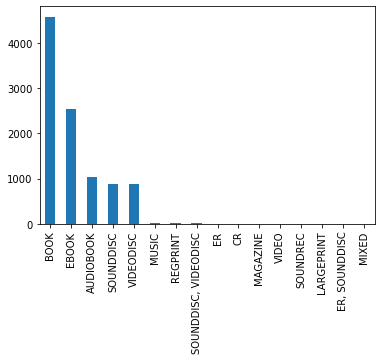

In [145]:
checkouts_df['materialtype'].value_counts().plot(kind='bar')


---

## 1. Sortierung des Erscheinungsjahre absteigend
In der Ursprungsdatei sind in der Spalte "publicationyear" nicht-numerische Zeichen enthalten (Wörter, Bindestriche, Copyright etc.). Um die Daten für eine Verarbeitung aufzubereiten, werden im Folgenden diese Character entfernt. Bei der Angabe eines Zeitraums von-bis wird das erste Jahr berücksichtigt.

In [146]:
import re

In [147]:
#aus Spalte publicationyear alle Nicht-Zahl-Character (Basis ASCII-Range, Brackets, Space) entfernen. 
#Auch Zeitraeume von-bis enthalten -> nur die ersten 4 Zahlen von Zeilenanfang werden berücksichtigt.

checkouts_clean_df = checkouts_df.replace({'publicationyear': r'[\]|\.\[℗©a-zA-Z\u0080-\uFFFF]'}, {'publicationyear':''}, regex=True)

In [148]:
checkouts_clean1_df = checkouts_clean_df.replace({'publicationyear': r'(^\s\s?\d{2}\s\s?)'}, {'publicationyear':''}, regex=True)

In [149]:
checkouts_clean2_df = checkouts_clean1_df.replace({'publicationyear': r'(^\s?\d{4})(.+)?'}, {'publicationyear': r'\1'}, regex=True)

In [150]:
checkouts_clean3_df = checkouts_clean2_df.replace({'publicationyear': r'^\s'}, {'publicationyear': ''}, regex=True)

In [151]:
checkouts_clean4_df = checkouts_clean3_df.replace({'publicationyear': r'^.{0,3}$'}, {'publicationyear': ''}, regex=True)

In [152]:
#na durch leere str ersetzen (da sonst ValueError, weil na kein int)
checkouts_clean_final_df = checkouts_clean4_df.fillna('0')

In [153]:
#Kontrolle der Erscheinungsjahre -> entweder '' oder vierstellige Zahl, die plausibel als EJ scheint
checkouts_clean_final_df['publicationyear'].unique()

array(['2014', '2017', '2012', '2016', '1964', '2018', '2000', '2010',
       '2013', '2007', '2001', '2004', '2008', '2011', '2009', '2006',
       '1994', '1971', '2015', '1991', '1997', '1990', '2002', '2005',
       '1999', '1987', '1993', '1980', '1995', '2003', '1996', '1983',
       '1966', '1942', '1946', '1900', '0', '1986', '1998', '2019',
       '1916', '1988', '1981', '1992', '1974', '1989', '1977', '1979',
       '1965', '1936', '1948', '1978', '1968', '1969', '1972', '1985',
       '1975', '1970', '1952', '1961', '1947', '1984', '1962', '1911',
       '1976', '1959', '1944', '1931', '1967', '1973', '1982', '1945',
       '1940', '1928', '1963', '1909', '1912', '1913', '1958', '1943',
       '1953', '1960', '1954', '1937', '1935'], dtype=object)

In [154]:
checkouts_clean_final_df.sort_values(by=['publicationyear'], ascending=False)

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
2024,Physical,Horizon,BOOK,2018,12,2,A journey into yin yoga / Travis Eliot.,"Eliot, Travis, 1977-",Yin yoga,"Human Kinetics,",2019
4673,Physical,Horizon,BOOK,2018,12,4,"Let's go. Europe / [researcher-writers, Julia ...",0,"Europe Guidebooks, Guidebooks","Let's Go, Inc.,",2019
5520,Physical,Horizon,BOOK,2018,12,2,Yasmin the painter / written by Saadia Faruqi ...,"Faruqi, Saadia","Muslim girls Juvenile fiction, Muslim families...","Picture Window Books, a Capstone imprint,",2019
748,Physical,Horizon,BOOK,2018,12,3,Feeling lonely / by Kirsty Holmes.,"Holmes, Kirsty","Loneliness in children Juvenile literature, Em...","KidHaven Publishing,",2019
7141,Physical,Horizon,BOOK,2018,12,1,The American Heritage children's dictionary / ...,0,"English language Dictionaries Juvenile, Dictio...","Houghton Mifflin Harcourt,",2019
...,...,...,...,...,...,...,...,...,...,...,...
9138,Physical,Horizon,BOOK,2018,12,2,ILLM Jean-Charles Moreux : architecte-decorate...,0,0,0,0
8818,Physical,Horizon,BOOK,2018,12,2,ILLM Economic history of the American steel in...,0,0,0,0
8285,Physical,Horizon,BOOK,2018,12,55,Uncataloged Folder or Bag--WTS,0,0,0,0
8491,Physical,Horizon,BOOK,2018,12,2,ILLM Physical expression on stage and screen :...,0,0,0,0



---

## 2. Analyse Materialtype "Book", "eBook" & "Audiobook"
Subset bilden und als eigenen Dataframe definieren

In [155]:
types = ["BOOK", "AUDIOBOOK", "EBOOK"]
checkouts_books_df = checkouts_clean_final_df[checkouts_clean_final_df['materialtype'].isin(types)]
checkouts_books_df

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Physical,Horizon,BOOK,2018,12,1,"Naruto. Vol. 65, Hashirama and Madara / story ...","Kishimoto, Masashi, 1974-",Naruto Fictitious character Comic books strips...,"VIZ Media,",2014
1,Physical,Horizon,BOOK,2018,12,2,Oishisō na shirokuma / Shibata Keiko.,"Shibata, Keiko.","Polar bear Juvenile fiction, Food Juvenile fic...","Pīeichipīkenkyūjo,",2017
3,Digital,OverDrive,AUDIOBOOK,2018,12,3,Catch a Falling Heiress: American Heiress In L...,Laura Lee Guhrke,"Fiction, Historical Fiction, Romance",HarperCollins Publishers Inc.,2016
4,Physical,Horizon,BOOK,2018,12,1,Literally show me a healthy person / Darcie Wi...,"Wilder, Darcie","Young women Fiction, Grief Fiction","Tyrant Books,",2017
5,Physical,Horizon,BOOK,2018,12,1,The destruction of Dresden. / With an introd. ...,"Irving, David John Cawdell, 1938-",World War 1939 1945 Destruction and pillage Ge...,"Holt, Rinehart and Winston,",1964
...,...,...,...,...,...,...,...,...,...,...,...
9990,Physical,Horizon,BOOK,2018,12,1,The fishermen / Chigozie Obionma.,"Obioma, Chigozie, 1986-","Brothers Fiction, Fratricide Fiction, Large ty...","Thorndike Press,",2015
9991,Digital,OverDrive,EBOOK,2018,12,3,"Don't Call Me Princess: Essays on Girls, Women...",Peggy Orenstein,"Essays, Literary Criticism, Nonfiction, Sociology",HarperCollins Publishers Inc.,2018
9994,Physical,Horizon,BOOK,2018,12,3,Turtle in paradise / Jennifer L. Holm.,"Holm, Jennifer L.","Cousins Juvenile fiction, Families Florida Juv...","Yearling Newbery,",2016
9997,Physical,Horizon,BOOK,2018,12,3,The empty pot / Demi.,Demi,"Folklore China, Honesty Juvenile literature, P...","Henry Holt and Company,",2012


<AxesSubplot:xlabel='materialtype'>

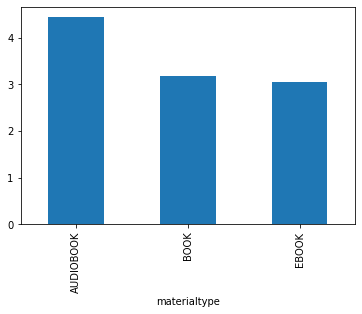

In [156]:
checkouts_books_df.groupby('materialtype')['checkouts'].mean().plot(kind='bar')

#### Verteilung Erscheinungsjahre be Book, eBook, Audiobook

In [157]:
checkouts_books_df['publicationyear'].astype(int)

0       2014
1       2017
3       2016
4       2017
5       1964
        ... 
9990    2015
9991    2018
9994    2016
9997    2012
9999    2009
Name: publicationyear, Length: 8143, dtype: int64

In [158]:
year_counts = checkouts_books_df['publicationyear'].value_counts()
year_counts

2018    1108
2017     967
2016     781
2013     759
2015     699
        ... 
1946       1
1940       1
1937       1
1948       1
1916       1
Name: publicationyear, Length: 83, dtype: int64

<AxesSubplot:>

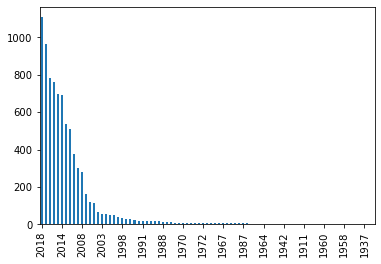

In [166]:
n = 5

ax = checkouts_books_df['publicationyear'].value_counts().plot(kind='bar')
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])

ax


<AxesSubplot:xlabel='publicationyear'>

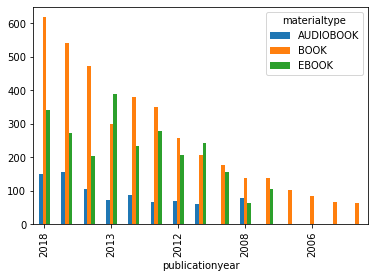

In [160]:
#Quelle: https://stackoverflow.com/questions/19143857

n = 3

ax = checkouts_books_df.groupby('materialtype')['publicationyear'].value_counts().nlargest(35).unstack(0).plot(kind='bar')
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()] #get_ticklabels() -> get the tick labels as a list of Text instances
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
ax


---

## 3. Checkouts im Verhältnis zu Sacherschließung und Physische Form (Usageclass)
### 3a. Sind Ressourcen mit mehr Schlagwörtern häufiger entliehen?

Die Schlagwörter werden - separiert nach Kommata - gezählt, diese Zahl wird in einer neuen Spalte "subject_len" angehängt.

In [161]:
checkouts_df['subject_len'] = checkouts_df.subjects.apply(lambda x: len(str(x).split(', ')))

In [162]:
checkouts_df

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear,subject_len
0,Physical,Horizon,BOOK,2018,12,1,"Naruto. Vol. 65, Hashirama and Madara / story ...","Kishimoto, Masashi, 1974-",Naruto Fictitious character Comic books strips...,"VIZ Media,",[2014],3
1,Physical,Horizon,BOOK,2018,12,2,Oishisō na shirokuma / Shibata Keiko.,"Shibata, Keiko.","Polar bear Juvenile fiction, Food Juvenile fic...","Pīeichipīkenkyūjo,",2017.,4
2,Physical,Horizon,VIDEODISC,2018,12,7,Like crazy / Paramount Vantage ; Indian Paintb...,NaN,"First loves Drama, College students Drama, Fea...","Paramount Home Entertainment,",[2012],6
3,Digital,OverDrive,AUDIOBOOK,2018,12,3,Catch a Falling Heiress: American Heiress In L...,Laura Lee Guhrke,"Fiction, Historical Fiction, Romance",HarperCollins Publishers Inc.,2016,3
4,Physical,Horizon,BOOK,2018,12,1,Literally show me a healthy person / Darcie Wi...,"Wilder, Darcie","Young women Fiction, Grief Fiction","Tyrant Books,",[2017],2
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Physical,Horizon,SOUNDDISC,2018,12,1,Water / Gregory Porter.,"Porter, Gregory","Jazz vocals, Jazz 2001 2010","Motéma Music,",[2010],2
9996,Physical,Horizon,VIDEODISC,2018,12,5,Tyler Perry's I can do bad all by myself / Lio...,NaN,"Simmons Madea Fictitious character Drama, Burg...","Lionsgate,",[2010],11
9997,Physical,Horizon,BOOK,2018,12,3,The empty pot / Demi.,Demi,"Folklore China, Honesty Juvenile literature, P...","Henry Holt and Company,",2012.,3
9998,Physical,Horizon,VIDEODISC,2018,12,8,Little Dorrit / BBC Productions/WGBH co-produc...,NaN,Marshalsea Prison Southwark London England Dra...,"BBC Video : distributed by Warner Home Video,",2009.,8


In [163]:
#Frequenz der subject_len prüfen
checkouts_df.groupby('subject_len').size()

subject_len
1      785
2     2872
3     2282
4     1562
5      737
6      585
7      456
8      278
9      191
10     100
11      61
12      36
13      19
14      14
15       6
16       5
17       2
18       4
20       3
22       2
dtype: int64

<AxesSubplot:xlabel='subject_len'>

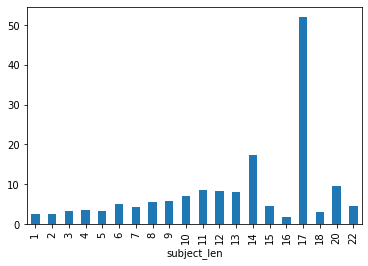

In [164]:
checkouts_df.groupby('subject_len')['checkouts'].mean().plot(kind='bar')

### 3b. Checkouts nach Digital und Physical

<AxesSubplot:xlabel='usageclass'>

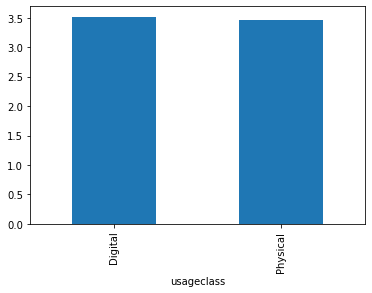

In [165]:
#df.groupby('country').plot(x='year', y='unemployment')
checkouts_df.groupby('usageclass')['checkouts'].mean().plot(kind='bar')